# 방범용 CCTV 위치와 인구 데이터분석
- http://data.busan.go.kr/
- 파일데이터 "부산광역시_방범용 CCTV 정보_20230622.csv" 다운로드
- 목표 : CCTV 수와 인구대비 CCTV 비율을 파악
- 인구대비 CCTV의 평균치를 확인하고 그로부터 CCTV가 과하게 부족한 구를 확인

In [1]:
import pandas as pd
file_path = "./ref/부산광역시방범용CCTV정보20230622.csv"
CCTV = pd.read_csv(file_path,encoding="EUC-KR")
CCTV.sample(3)

,CCTV 명칭,CCTV 좌표,CCTV 그룹
2965,(7차)_형제기공옆_사상로43-1,"10.1.11.180:0:0:0:0:0:0,10.1.11.180:9400:",사상-7차
4241,(13차)_신촌로49_미니스톱_거제현대점,"10.1.10.126:0:0:0:0:0:0,10.1.10.126:9403:",연제-13차
1827,(10차)_아시아드대로_181번길_52_꼼꼼이_옷수선_앞,"10.1.11.200:0:0:0:0:0:0,10.1.11.200:9400:",동래-10차


In [2]:
# CCTV.columns = ["x","xx","local"]
cctv = CCTV.rename(columns={"CCTV 그룹":"local"})['local']

In [3]:
#방법1 (제일추천)
cctv = cctv.apply(lambda x:x.split("-")[0])

#방법2
# local_list=[]
# for v in cctv:
#     local_list.append(v.split("-")[0])
# cctv = pd.Series(local_list)

#방법3
# cctv = cctv.str.extract(r"(\D+)-")[0]

cctv = cctv.value_counts()
cctv = cctv.reset_index()

In [4]:
cctv.sample(3)

,local,count
12,남구,351
11,강서,352
15,중구,337


- 행정동별 연령별 인구현황
- https://jumin.mois.go.kr/ageStatMonth.do <br>
  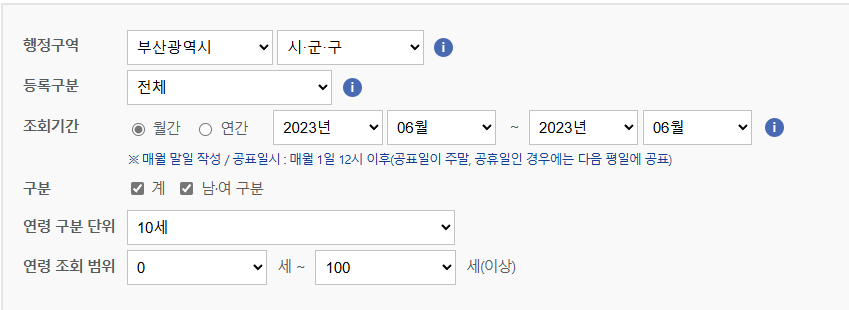

In [5]:
import pandas as pd
import warnings
warnings.simplefilter("ignore",UserWarning)
file_path2 = "./ref/연령별인구현황월간202306.xlsx"
ori = pd.read_excel(file_path2, sheet_name="연령별인구현황",skiprows=3)
ori.head()

,행정기관코드,행정기관,총 인구수,연령구간인구수,0~9세,10~19세,20~29세,30~39세,40~49세,50~59세,...,10~19세.2,20~29세.2,30~39세.2,40~49세.2,50~59세.2,60~69세.2,70~79세.2,80~89세.2,90~99세.2,100세 이상.2
0,2600000000,부산광역시,"3,306,993","3,306,993","200,627","264,771","386,558","393,792","489,807","539,964",...,"128,872","187,837","191,071","242,526","276,337","296,378","172,706","87,000","13,119",384
1,2611000000,부산광역시 중구,"39,311","39,311",931,"1,773","5,638","4,310","4,582","6,423",...,914,"2,964","2,037","2,096","3,078","4,109","2,877","1,532",251,15
2,2614000000,부산광역시 서구,"104,449","104,449","5,060","7,063","12,272","10,400","13,778","16,812",...,"3,447","6,366","5,059","6,730","8,260","10,223","7,044","3,969",632,12
3,2617000000,부산광역시 동구,"86,809","86,809","3,903","4,636","9,480","10,598","11,324","13,941",...,"2,254","4,847","4,991","5,212","6,703","8,376","6,120","3,566",494,10
4,2620000000,부산광역시 영도구,"107,006","107,006","4,364","6,815","10,089","9,716","13,733","17,687",...,"3,324","4,551","4,448","6,540","8,538","11,533","8,255","4,438",601,17


In [6]:
cctv

,local,count
0,사하,431
1,사상,422
2,해운대,418
3,동래,404
4,금정,403
5,북구,403
6,진구,395
7,영도,381
8,연제,377
9,동구,374


In [7]:
data = ori[['행정기관','총 인구수']]
data.columns=['local','population']
data = data.loc[1:]
data['local'] = data['local'].apply(lambda x:x.replace("부산광역시 ","").strip())
data = data.reset_index(drop=True) # drop = True는 기존 인덱스를 삭제하고 새롭게 부여
data

,local,population
0,중구,"39,311"
1,서구,"104,449"
2,동구,"86,809"
3,영도구,"107,006"
4,부산진구,"357,475"
5,동래구,"272,590"
6,남구,"255,786"
7,북구,"276,684"
8,해운대구,"383,355"
9,사하구,"300,922"


In [8]:
# cctv = cctv.sort_values(by="local",ascending=True)
# data = data.sort_values(by="local",ascending=True)

# 방법1
# total.columns = ['local','count','localx','population']
# total = total.drop(columns=['localx'])
# total = pd.concat([cctv,data],axis=1)

# 방법2
# total = total.drop(total.columns[2],axis=1) #이름이 같을경우 인덱스가 사용안됨. 이걸 쓸때는 컬럼 이름이 중복되면 안됨

In [9]:
# 공백 조심 data['local'] = data['local'].apply(lambda x: len(x))
data['local'] = data['local'].apply(lambda x: x.replace('구',"").replace("군","").replace('부산진','진구').strip() if len(x.strip())>2 else x)
data

,local,population
0,중구,"39,311"
1,서구,"104,449"
2,동구,"86,809"
3,영도,"107,006"
4,진구,"357,475"
5,동래,"272,590"
6,남구,"255,786"
7,북구,"276,684"
8,해운대,"383,355"
9,사하,"300,922"


In [19]:
total = pd.merge(cctv,data, on='local')
total['population'] = total['population'].str.replace(",","").astype(int)
total = total.sort_values(by="population", ascending=False)
total = total.set_index('local') # 중요⭐  > local을 아예 인덱스화 시킴 ⭐⭐⭐
total

,count,population
local,,
해운대,418,383355
진구,395,357475
사하,431,300922
북구,403,276684
동래,404,272590
남구,351,255786
금정,403,218711
사상,422,203029
연제,377,202919


In [13]:
# 윈도우용 폰트 경로 설정
# path = 'C:\\Windows\\Fonts\\Hancom Gothic Bold.ttf'
# font_name = fm.FontProperties(fname=path).get_name()
# rc('font',family=font_name)
# plt.text(0.2,0.4,'한글')

#리눅스용 폰트 경로 설정

plt.rc('font',family="NanumGothic")
plt.text(0.2,0.4,'한글',size=100)

NameError: name 'plt' is not defined

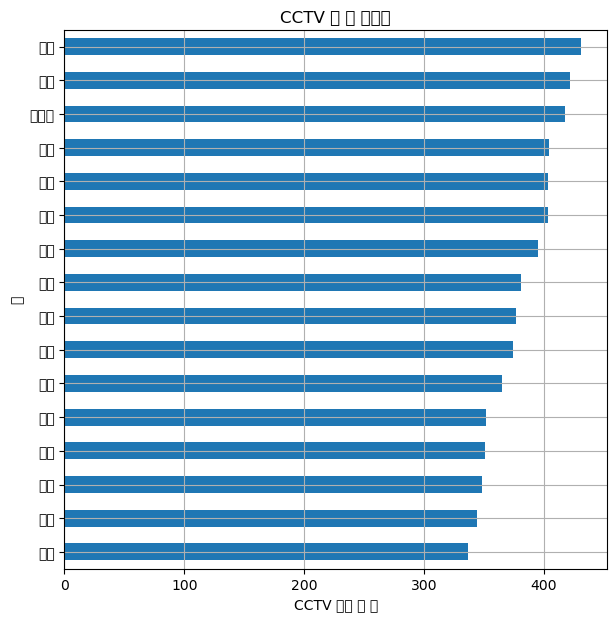

In [14]:
import matplotlib.pyplot as plt
# plt.figure()
total['count'].sort_values().plot(x='local', y='count',kind='barh',grid=True,figsize=(7,7),ylabel="구")

plt.title("CCTV 구 별 데이터")
plt.xlabel("CCTV 설치 대 수")

plt.show()

[]

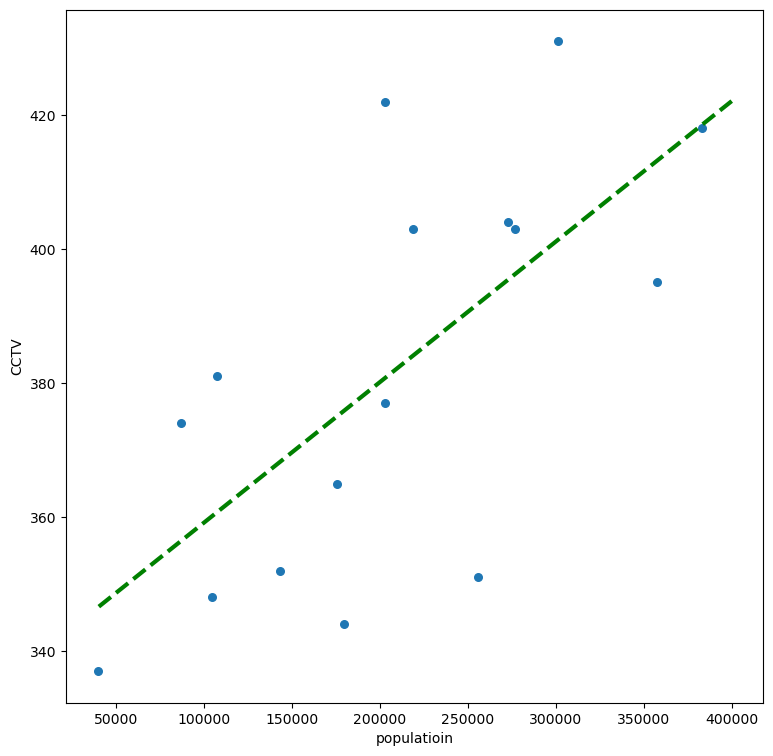

In [17]:
import numpy as np
fp1 = np.polyfit(total['population'],total['count'], 1)
f1 = np.poly1d(fp1)
fx = np.linspace(40000,400000,10)
plt.figure(figsize=(9,9))
plt.plot(fx,f1(fx), ls='dashed', lw=3, color='g')
plt.scatter(total['population'], total['count'], s= 30)
plt.xlabel('populatioin')
plt.ylabel('CCTV')
plt.plot()

NameError: name 'count' is not defined

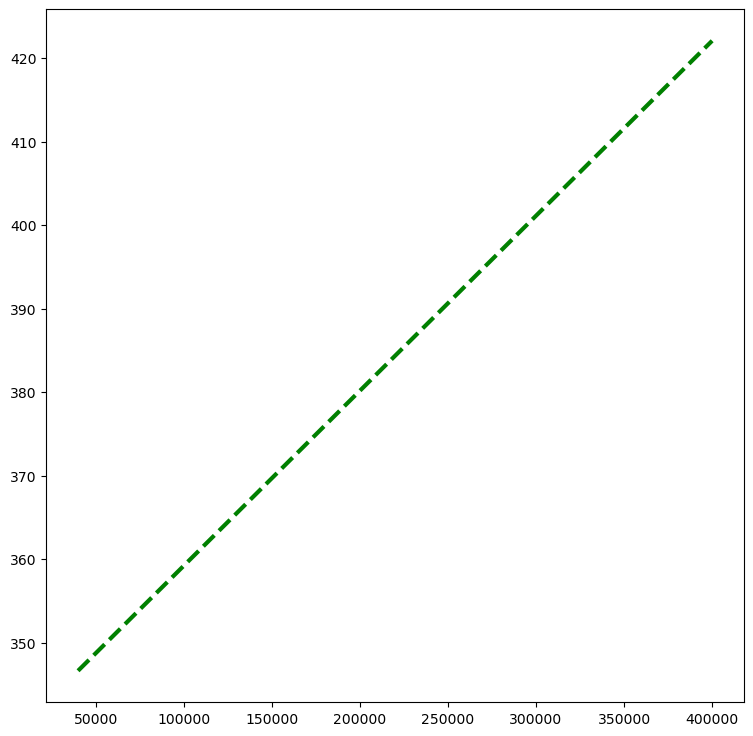

In [18]:
import numpy as np
fp1 = np.polyfit(total['population'],total['count'], 1)
f1 = np.poly1d(fp1)
fx = np.linspace(40000,400000,10)
plt.figure(figsize=(9,9))
plt.plot(fx,f1(fx), ls='dashed', lw=3, color='g')

#오차
total['err'] = np.abs(total[count] - f1(total['population']))
plt.scatter(total['population'], total['count'], s= 30)
plt.xlabel('populatioin')
plt.ylabel('CCTV')
plt.plot()

# 점마다 각 동의 이름(라벨)을 부여
for i in range(len(total['population'])):
    plt.text(total['population'].iloc[i]*0.95,total['count'].iloc[i]*1.007,total.index[i],fontsize=15)


plt.grid()
plt.colorbar()
plt.show()

